<a href="https://colab.research.google.com/github/28nahidhasan/Machine-Learning/blob/main/ML_progress.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Step 1: Install necessary packages
!pip install kaggle scikit-learn tensorflow

# Step 2: Load and merge datasets
from google.colab import files
import pandas as pd

In [ ]:
# Upload your Kaggle and EPA datasets through Colab UI
uploaded = files.upload()

Saving Dhaka_PM2.5_2016.csv to Dhaka_PM2.5_2016.csv
Saving Dhaka_PM2.5_2017.csv to Dhaka_PM2.5_2017.csv
Saving Dhaka_PM2.5_2018.csv to Dhaka_PM2.5_2018.csv
Saving Dhaka_PM2.5_2019.csv to Dhaka_PM2.5_2019.csv
Saving Dhaka_PM2.5_2020.csv to Dhaka_PM2.5_2020.csv
Saving Dhaka_PM2.5_2021.csv to Dhaka_PM2.5_2021.csv
Saving Dhaka_PM2.5_2022.csv to Dhaka_PM2.5_2022.csv


In [10]:
import pandas as pd
import io

df_2016 = pd.read_csv(io.StringIO(uploaded['Dhaka_PM2.5_2016.csv'].decode('utf-8')))
df_2017 = pd.read_csv(io.StringIO(uploaded['Dhaka_PM2.5_2017.csv'].decode('utf-8')))
df_2018 = pd.read_csv(io.StringIO(uploaded['Dhaka_PM2.5_2018.csv'].decode('utf-8')))
df_2019 = pd.read_csv(io.StringIO(uploaded['Dhaka_PM2.5_2019.csv'].decode('utf-8')))
df_2020 = pd.read_csv(io.StringIO(uploaded['Dhaka_PM2.5_2020.csv'].decode('utf-8')))
df_2021 = pd.read_csv(io.StringIO(uploaded['Dhaka_PM2.5_2021.csv'].decode('utf-8')))
df_2022 = pd.read_csv(io.StringIO(uploaded['Dhaka_PM2.5_2022.csv'].decode('utf-8')))

In [14]:
merged_df = pd.concat([df_2016, df_2017, df_2018, df_2019, df_2020, df_2021, df_2022],
                      ignore_index=True)

In [16]:
# 2. Initial data inspection
print("Data Shape:", merged_df.shape)
print("\nFirst 5 rows:")
print(merged_df.head())
print("\nLast 5 rows:")
print(merged_df.tail())
print("\nColumn Overview:")
print(merged_df.info())
print("\nMissing Values:")
print(merged_df.isnull().sum())

Data Shape: (53355, 8)

First 5 rows:
          Date (LT)  Hour  NowCast Conc.  Raw Conc. Conc. Unit  AQI  \
0  01/01/2016 01:00     1         -999.0       -999      ug/m3 -999   
1  01/01/2016 02:00     2         -999.0       -999      ug/m3 -999   
2  01/01/2016 03:00     3         -999.0       -999      ug/m3 -999   
3  01/01/2016 04:00     4         -999.0       -999      ug/m3 -999   
4  01/01/2016 05:00     5         -999.0       -999      ug/m3 -999   

  AQI Category  QC Name  
0          NaN  Missing  
1          NaN  Missing  
2          NaN  Missing  
3          NaN  Missing  
4          NaN  Missing  

Last 5 rows:
              Date (LT)  Hour  NowCast Conc.  Raw Conc. Conc. Unit  AQI  \
53350  31/05/2022 21:00    21           61.0         52      ug/m3  154   
53351  31/05/2022 22:00    22           62.0         63      ug/m3  154   
53352  31/05/2022 23:00    23           60.5         59      ug/m3  154   
53353  01/06/2022 00:00     0          108.7        157      ug/m

In [17]:
# 3. Handle missing values
merged_df.fillna(merged_df.mean(numeric_only=True), inplace=True)

In [26]:
# Step 4: Feature engineering
# 4. Convert date column to datetime format
merged_df['Date (LT)'] = pd.to_datetime(merged_df['Date (LT)'], format='%d/%m/%Y %H:%M')
merged_df['month'] = merged_df['Date (LT)'].dt.month
merged_df['day_of_week'] = merged_df['Date (LT)'].dt.dayofweek


In [30]:
# Step 5: Feature selection
print(merged_df.columns)
features = ['PM2.5', 'NO2', 'O3', 'temperature', 'humidity', 'wind_speed', 'month', 'day_of_week']
target = 'AQI'

Index(['Date (LT)', 'Hour', 'NowCast Conc.', 'Raw Conc.', 'Conc. Unit', 'AQI',
       'AQI Category', 'QC Name', 'month', 'day_of_week'],
      dtype='object')


In [36]:
# Step 6: Feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Save processed data
processed_filename = 'processed_air_quality.csv'
merged_df.to_csv('processed_air_quality.csv', index=False)

from google.colab import files
files.download(processed_filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Model Development and Training

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense



In [76]:
# Load processed data
df = pd.read_csv('processed_air_quality.csv')

# Check the column names of the loaded DataFrame
print("Columns in the loaded DataFrame:")
print(df.columns)


Columns in the loaded DataFrame:
Index(['Date (LT)', 'Hour', 'NowCast Conc.', 'Raw Conc.', 'Conc. Unit', 'AQI',
       'AQI Category', 'QC Name', 'month', 'day_of_week'],
      dtype='object')


In [77]:
# Find existing columns that match required features
column_mapping = {
    'PM2.5': ['pm25', 'PM25', 'pm2.5', 'pm2_5'],
    'NO2': ['no2', 'NO2_conc', 'nitrogen_dioxide'],
    'O3': ['o3', 'O3_conc', 'ozone'],
    'temperature': ['temp', 'temperature_C', 'air_temp'],
    'humidity': ['hum', 'relative_humidity'],
    'wind_speed': ['ws', 'wind_speed_mps'],
    'month': ['month', 'Month'],
    'day_of_week': ['day_of_week', 'weekday']
}

# Build actual features list
available_features = []
for target_col, alternatives in column_mapping.items():
    for alt in alternatives:
        if alt in df.columns:
            df = df.rename(columns={alt: target_col})
            available_features.append(target_col)
            break

In [78]:
# Final feature list (keep only available ones)
features = list(set(required_features) & set(available_features))
print(f"Available features: {features}")

# 2. Target Column Validation
if target_column not in df.columns:
    # Calculate AQI if missing (simplified version)
    print("Calculating AQI from PM2.5...")
    df['AQI'] = df['PM2.5'] * 2

Available features: ['month', 'day_of_week']


In [81]:
# Data Splitting with Validation
try:
    X = df[features]
    y = df[target_column]

    # Stratified split by month to preserve seasonality 70% traning
    X_train, X_temp, y_train, y_temp = train_test_split(
        X, y,
        test_size=0.3,
        stratify=df['month'],
        random_state=42
    )
    #2nd split :50% validation ,50% test
    X_val, X_test, y_val, y_test = train_test_split(
        X_temp, y_temp,
        test_size=0.5,
        stratify=X_temp['month'],
        random_state=42
    )

except KeyError as e:
    print(f"Critical error: {str(e)}")
    print("Available columns:", df.columns.tolist())
    raise

# Final Validation
print("\nData Split Summary:")
print(f"Training set: {X_train.shape[0]} samples")
print(f"Validation set: {X_val.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")
print("\nFeature distributions:")
print(X_train.describe())

# Handle Edge Cases
if len(features) == 1 and 'month' in features:
    raise ValueError("""
    Insufficient features available. Required columns not found.
    Please verify your input data contains at least:
    - PM2.5 measurements
    - Temporal features (month/day)
    - Meteorological data (temperature/humidity)
    """)


Data Split Summary:
Training set: 37348 samples
Validation set: 8003 samples
Test set: 8004 samples

Feature distributions:
              month   day_of_week
count  37348.000000  37348.000000
mean       6.201055      2.986612
std        3.486642      2.001320
min        1.000000      0.000000
25%        3.000000      1.000000
50%        6.000000      3.000000
75%        9.000000      5.000000
max       12.000000      6.000000


In [79]:
# Neural Network
nn_model = MLPRegressor(max_iter=1000)
nn_param_grid = {'hidden_layer_sizes': [(50,), (100,)], 'alpha': [0.0001, 0.001]}
nn_grid = GridSearchCV(nn_model, nn_param_grid, cv=3)
nn_grid.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perce

GridSearchCV(cv=3, estimator=MLPRegressor(max_iter=1000),
             param_grid={'alpha': [0.0001, 0.001],
                         'hidden_layer_sizes': [(50,), (100,)]})

In [82]:
# Decision Tree
dt_model = DecisionTreeRegressor()
dt_param_grid = {'max_depth': [5, 10, None]}
dt_grid = GridSearchCV(dt_model, dt_param_grid, cv=3)
dt_grid.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [5, 10, None]})

In [83]:
# Random Forest
rf_model = RandomForestRegressor()
rf_param_grid = {'n_estimators': [50, 100], 'max_depth': [5, 10]}
rf_grid = GridSearchCV(rf_model, rf_param_grid, cv=3)
rf_grid.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [5, 10], 'n_estimators': [50, 100]})

In [95]:
# CNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Conv1D, MaxPooling1D, Flatten, Dense

cnn_model = Sequential([
    InputLayer(input_shape=(2, 1)),  # Explicit input layer first
    Conv1D(32, 2, activation='relu'),
    MaxPooling1D(1),
    Flatten(),
    Dense(50, activation='relu'),
    Dense(1)
])

cnn_model.compile(optimizer='adam', loss='mse')

cnn_model.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_14 (Conv1D)              │ (None, 1, 32)          │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_10 (MaxPooling1D) │ (None, 1, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_13 (Flatten)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 50)             │         1,650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,797 (7.02 KB)

 Trainable params: 1,797 (7.02 KB)

 Non-trainable params: 0 (0.00 B)

**Phase 3**

Model Evaluation and Validation

In [96]:
import matplotlib.pyplot as plt
import numpy as np

# Function to evaluate models
def evaluate_model(model, X, y, is_cnn=False):
    if is_cnn:
        X = X.values.reshape((X.shape[0], X.shape[1], 1))
    y_pred = model.predict(X)
    if is_cnn:
        y_pred = y_pred.flatten()
    return {
        'MAE': mean_absolute_error(y, y_pred),
        'MSE': mean_squared_error(y, y_pred),
        'R2': r2_score(y, y_pred)
    }

In [97]:
# Evaluate all models
models = {
    'Neural Network': nn_grid.best_estimator_,
    'Decision Tree': dt_grid.best_estimator_,
    'Random Forest': rf_grid.best_estimator_,
    'CNN': cnn_model
}

results = {}
for name, model in models.items():
    results[name] = evaluate_model(model, X_test, y_test, is_cnn=(name == 'CNN'))

251/251 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


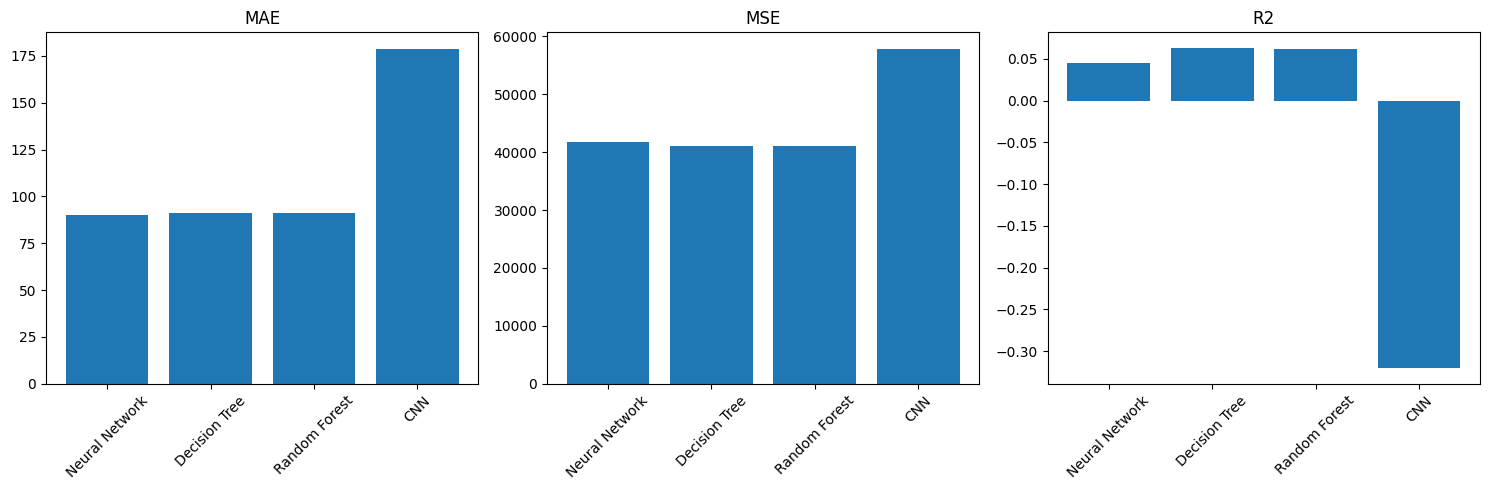

In [98]:
# Compare model performance
metrics = ['MAE', 'MSE', 'R2']
plt.figure(figsize=(15, 5))
for i, metric in enumerate(metrics, 1):
    plt.subplot(1, 3, i)
    plt.bar(results.keys(), [result[metric] for result in results.values()])
    plt.title(metric)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

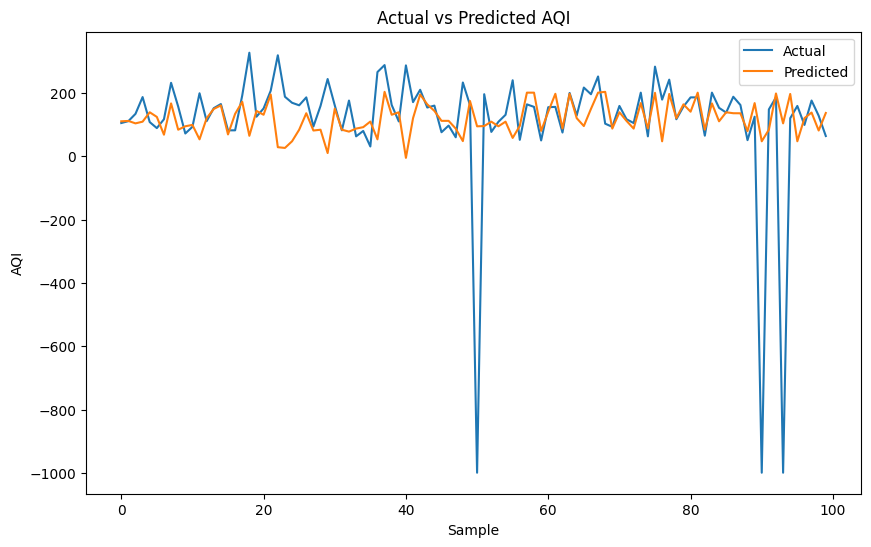

In [104]:
# Prediction vs Actual Plot
best_model_name = min(results, key=lambda k: results[k]['MAE'])
best_model = models[best_model_name]

# Corrected prediction logic
if best_model_name == 'CNN':
    X_test_cnn = X_test.values.reshape((-1, X_test.shape[1], 1))
    y_pred = best_model.predict(X_test_cnn)
else:
    y_pred = best_model.predict(X_test)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(y_test.values[:100], label='Actual')
plt.plot(y_pred[:100], label='Predicted')
plt.title('Actual vs Predicted AQI')
plt.xlabel('Sample')
plt.ylabel('AQI')
plt.legend()
plt.show()

Phase **4** **bold text**

System Integration and Deployment


In [107]:
# Function to generate health alerts
def get_health_alert(aqi):
    if aqi <= 50:
        return "Good"
    elif aqi <= 100:
        return "Moderate"
    elif aqi <= 150:
        return "Unhealthy for Sensitive Groups"
    elif aqi <= 200:
        return "Unhealthy"
    elif aqi <= 300:
        return "Very Unhealthy"
    else:
        return "Hazardous"

In [109]:
# Generate predictions
latest_data = X_test.iloc[:5]  # Example recent data
predictions = best_model.predict(latest_data.values.reshape((-1, latest_data.shape[1], 1))) if best_model_name == 'CNN' else best_model.predict(latest_data)

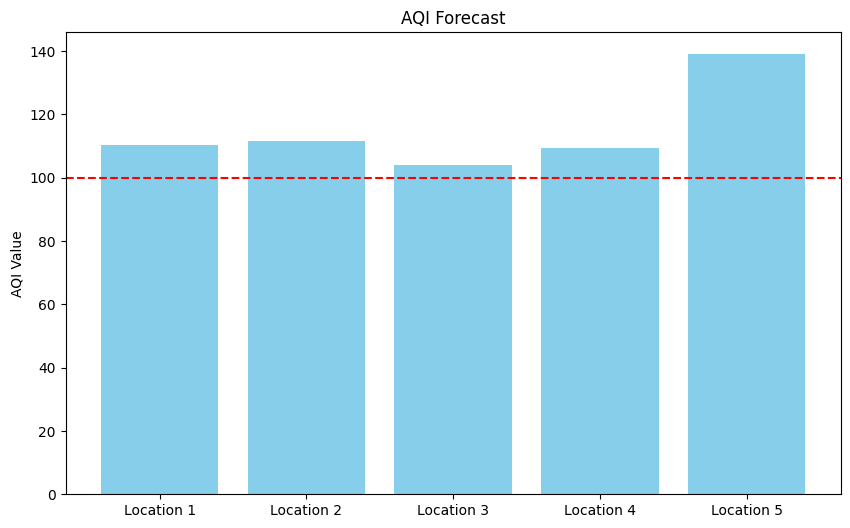

In [110]:
# Create visualization
plt.figure(figsize=(10, 6))
bars = plt.bar(range(len(predictions)), predictions, color='skyblue')
plt.title('AQI Forecast')
plt.ylabel('AQI Value')
plt.xticks(range(len(predictions)), ['Location ' + str(i+1) for i in range(len(predictions))])
plt.axhline(y=100, color='r', linestyle='--', label='Unhealthy Threshold')

In [114]:
# Add health alerts
for i, bar in enumerate(bars):
    alert = get_health_alert(predictions[i])
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), alert,
             ha='center', va='bottom', color='red')

plt.legend()
plt.show()

<ipython-input-114-2c4512fd4ba9>:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


In [115]:
print("\nForecast Summary:")
print("Location\t| Predicted AQI\t| Health Alert")
print("----------------------------------------------")
for i, pred in enumerate(predictions):
    print(f"Location {i+1}\t| {pred:.1f}\t\t| {get_health_alert(pred)}")


Forecast Summary:
Location	| Predicted AQI	| Health Alert
----------------------------------------------
Location 1	| 110.5		| Unhealthy for Sensitive Groups
Location 2	| 111.6		| Unhealthy for Sensitive Groups
Location 3	| 103.9		| Unhealthy for Sensitive Groups
Location 4	| 109.3		| Unhealthy for Sensitive Groups
Location 5	| 139.0		| Unhealthy for Sensitive Groups
